WeatherPy

Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
import time
from scipy.stats import linregress
import datetime

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Generate the Cities List by Using the citipy Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude
Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]['country']
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | zhezqazghan
Processing Record 2 of Set 1 | vorgashor
Processing Record 3 of Set 1 | tashtagol
Processing Record 4 of Set 1 | puerto natales
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | prince rupert
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | shamokin
Processing Record 9 of Set 1 | bilibino
Processing Record 10 of Set 1 | tranovaho
City not found. Skipping...
Processing Record 11 of Set 1 | udachny
Processing Record 12 of Set 1 | port said
Processing Record 13 of Set 1 | chonchi
Processing Record 14 of Set 1 | adamstown
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | port alfred
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | taiohae
City not found. Skipping...
Processing Record 19 of Set 1 | mugia
Processing Record 20 of Set 1 | lata
Processing Record 21 of Set 1 | ola
Processing Record 22

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,zhezqazghan,47.7833,67.7667,24.42,26,0,2.13,KZ,1722719043
1,vorgashor,67.5833,63.9500,12.68,67,100,7.13,RU,1722719044
2,tashtagol,52.7657,87.8894,15.26,97,100,0.67,RU,1722719045
3,puerto natales,-51.7236,-72.4875,3.25,93,75,1.03,CL,1722719047
4,georgetown,5.4112,100.3354,25.96,74,20,1.54,MY,1722719048


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhezqazghan,47.7833,67.7667,24.42,26,0,2.13,KZ,1722719043
1,vorgashor,67.5833,63.9500,12.68,67,100,7.13,RU,1722719044
2,tashtagol,52.7657,87.8894,15.26,97,100,0.67,RU,1722719045
3,puerto natales,-51.7236,-72.4875,3.25,93,75,1.03,CL,1722719047
4,georgetown,5.4112,100.3354,25.96,74,20,1.54,MY,1722719048


Create the Scatter Plots Requested
Latitude Vs. Temperature

In [8]:
datedatapull= datetime.date.today().strftime('%Y-%m-%d')
datedatapull

'2024-08-03'

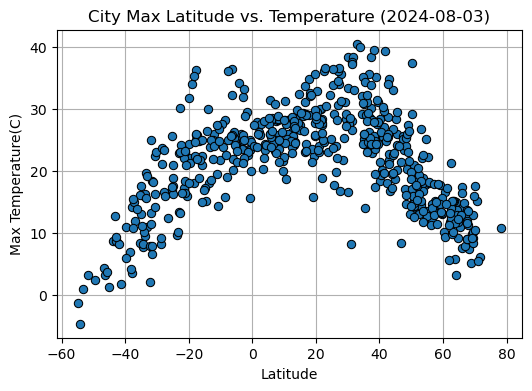

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
lat = city_data_df["Lat"]
Temp = city_data_df["Max Temp"]
# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize = (6,4))
plt.plot(lat, Temp, linestyle="none", marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Max Latitude vs. Temperature ({datedatapull})")
plt.grid()
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

Latitude Vs. Humidity

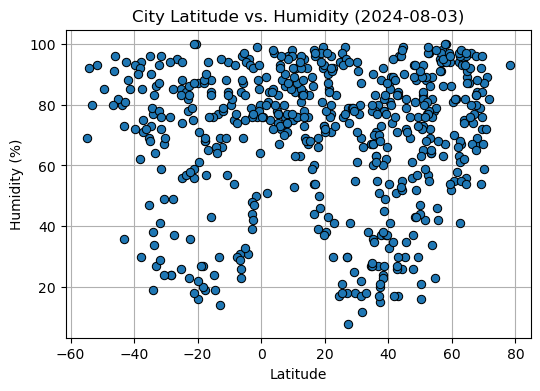

In [10]:
# Build the scatter plots for latitude vs. humidity
lat = city_data_df["Lat"]
humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize = (6,4))
plt.plot(lat, humidity, linestyle="none", marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({datedatapull})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

Latitude Vs. Cloudiness

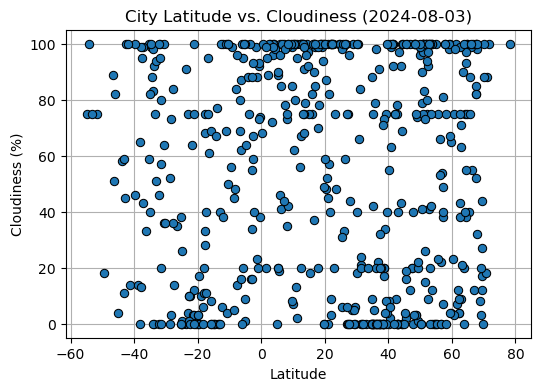

In [11]:
# Build the scatter plots for latitude vs. cloudiness
lat = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize = (6,4))
plt.plot(lat, cloudiness,linestyle="none", marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({datedatapull})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

Latitude vs. Wind Speed Plot

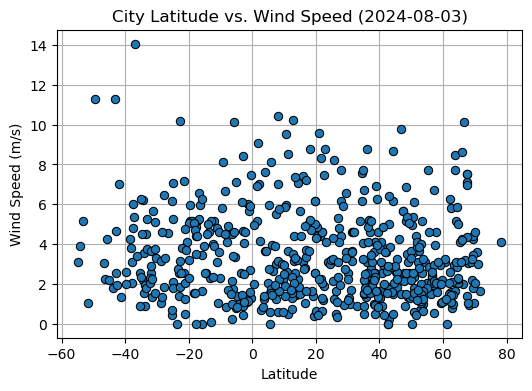

In [12]:
# Build the scatter plots for latitude vs. wind speed
lat = city_data_df["Lat"]
windspeed = city_data_df["Wind Speed"]

# Incorporate the other graph properties
# YOUR CODE HERE
plt.figure(figsize = (6,4))
plt.plot(lat, windspeed,linestyle="none", marker="o", 
         markeredgecolor="black", 
         markeredgewidth=0.75)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({datedatapull})")
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

___________________________________________________________________________________________

Requirement 2: Compute Linear Regression for Each Relationship



The r^2-value is 0.012


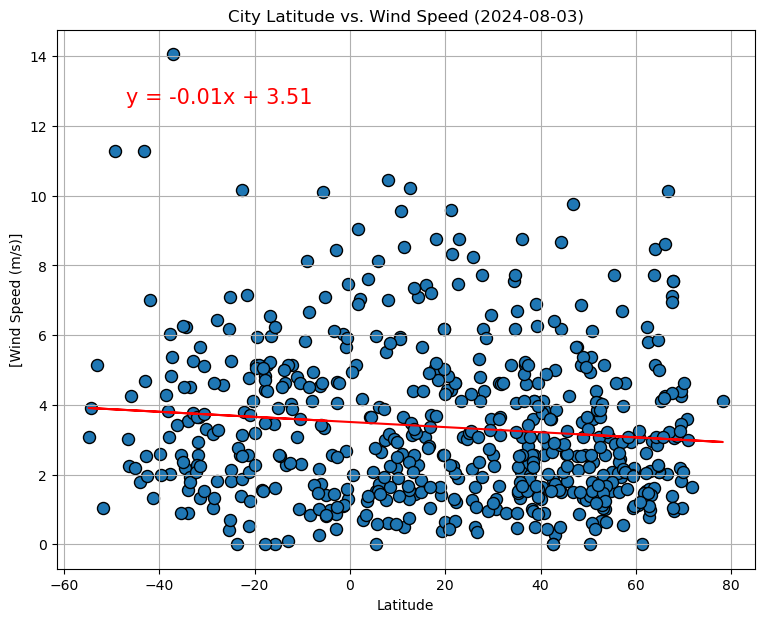

In [27]:
# Define a function to create Linear Regression plots
df=city_data_df
datasetID = 'TestFunction'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'

def linreg():
    xdata = df[xparam]
    ydata = df[yparam]
    correlation = st.pearsonr(xdata,ydata)
# calculate the linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(xdata,ydata)

    regression_equation = xdata * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.figure(figsize = (9,7))
    plt.scatter(xdata, ydata, marker="o", edgecolors="black",s =75)
    plt.plot(xdata, regression_equation, "r-")
    annotatex = min(xdata)+0.1*max(xdata)
    annotatey = max(ydata)-0.1*max(ydata)
    plt.annotate(line_eq,(annotatex,annotatey),fontsize=15,color="red")
    plt.title(f"City Latitude vs. {yparam} ({datedatapull})")
    plt.xlabel("Latitude")
    plt.ylabel(f"[{yparam} {yunits}]")
    plt.grid()

    print(f'The r^2-value is {round(rvalue**2,3)}')
 

    # Save the figure
    figname = f'{datasetID}_{xparam}_vs_{yparam}'
    
    plt.savefig(f"output_data/{figname}.png")

    # Show plot
    plt.show()
linreg()
    

In [28]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,zhezqazghan,47.7833,67.7667,24.42,26,0,2.13,KZ,1722719043
1,vorgashor,67.5833,63.9500,12.68,67,100,7.13,RU,1722719044
2,tashtagol,52.7657,87.8894,15.26,97,100,0.67,RU,1722719045
4,georgetown,5.4112,100.3354,25.96,74,20,1.54,MY,1722719048
5,prince rupert,54.3161,-130.3201,17.83,78,0,3.09,CA,1722719049


In [29]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,puerto natales,-51.7236,-72.4875,3.25,93,75,1.03,CL,1722719047
6,waitangi,-43.9535,-176.5597,8.79,80,58,1.79,NZ,1722719050
11,chonchi,-42.6128,-73.8092,8.56,94,100,1.96,CL,1722719056
12,adamstown,-25.0660,-130.1015,20.93,74,26,7.09,PN,1722719057
13,grytviken,-54.2811,-36.5092,-4.57,92,100,3.92,GS,1722719058


Temperature vs. Latitude Linear Regression Plot

The r^2-value is 0.445


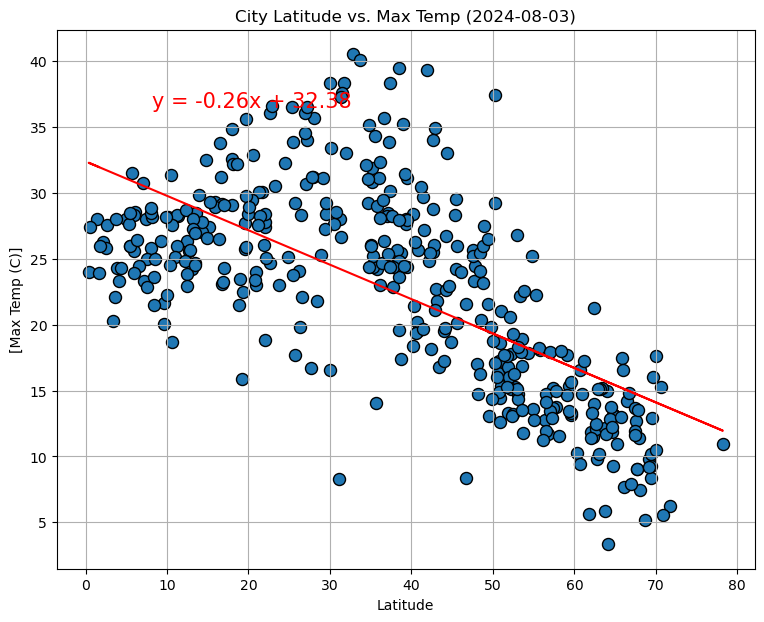

In [30]:
# Linear regression on Northern Hemisphere
df=northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Max Temp'
yunits = '(C)'
linreg()

The r^2-value is 0.604


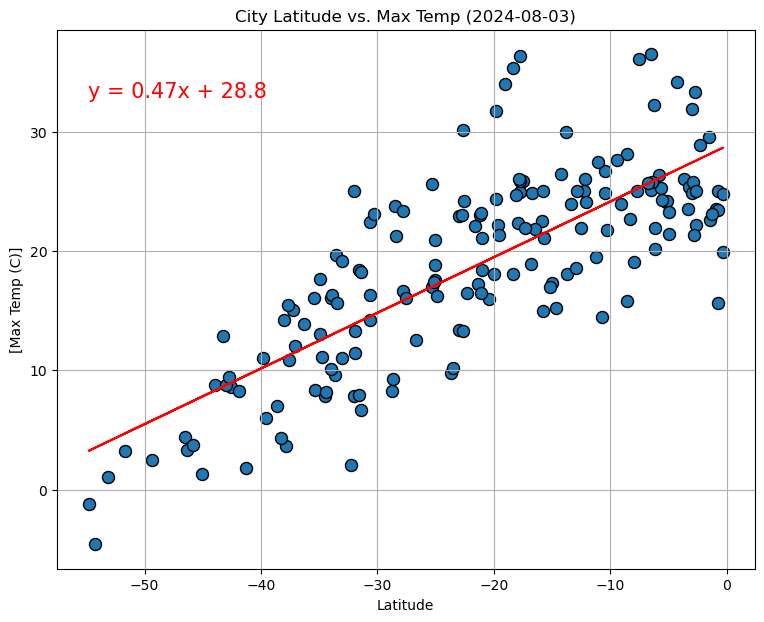

In [31]:
# Linear regression on Southern Hemisphere
df=southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Max Temp'
yunits = '(C)'
linreg()

Discussion on the Linear Relationship:

In both the Northern and Southern hemispheres, maximum temperature values increase as we approach the equator and decrease near the poles. In the Northern Hemisphere dataset, the r2 value of 0.4 indicates a moderate relationship between latitude and temperature, meaning that changes in latitude account for some of the temperature variability. In contrast, the Southern Hemisphere dataset shows a stronger relationship with an r2 value of 0.67, suggesting that latitude significantly influences temperature. However, other factors not captured by the model, such as altitude, proximity to oceans, prevailing wind patterns, seasonal effects, urban heat islands, and various geographical or meteorological variables, also play a role in temperature variability.

Humidity vs. Latitude Linear Regression Plot

The r^2-value is 0.0


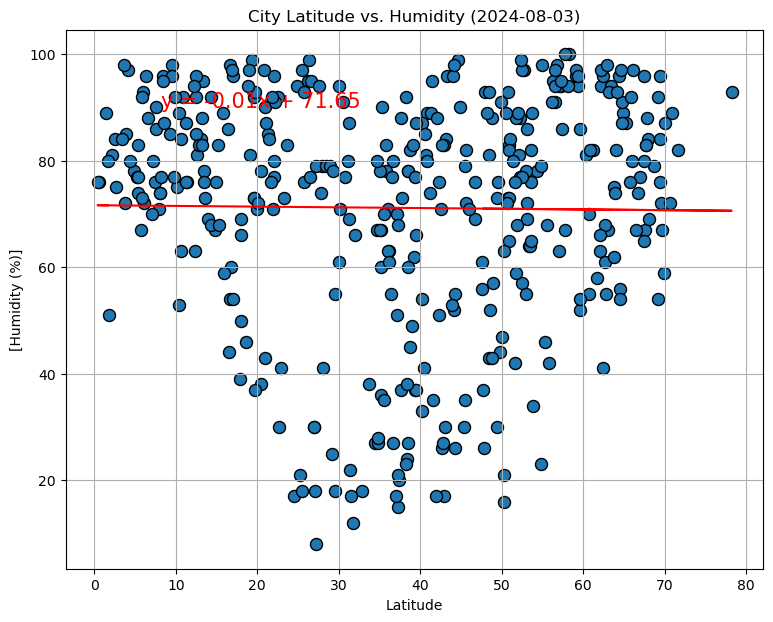

In [32]:
# Northern Hemisphere
df=northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Humidity'
yunits = '(%)'
linreg()

The r^2-value is 0.008


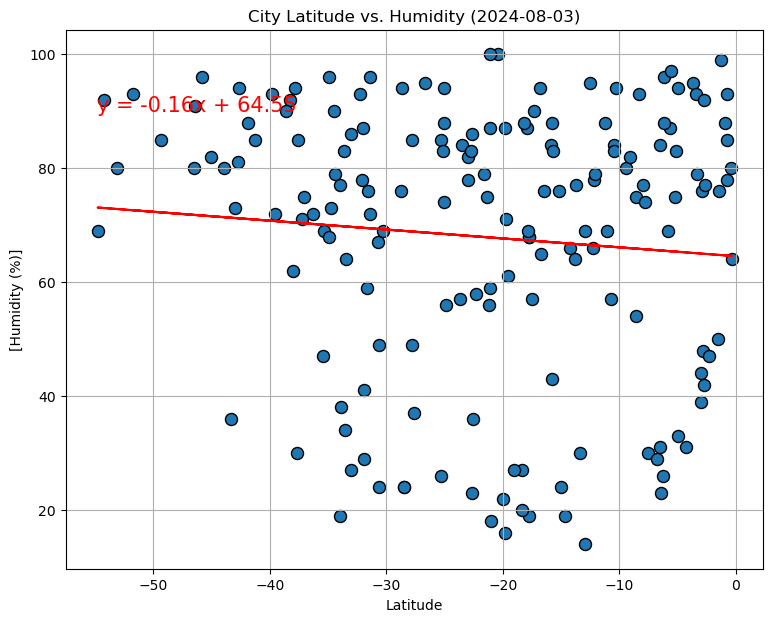

In [33]:
# Southern Hemisphere
df=southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Humidity'
yunits = '(%)'
linreg()

Discussion on the Linear Relationship: The r2 values for the Northern and Southern hemispheres for latitude versus humidity are 0 and close to 0, respectively. This suggests that there is no relationship between latitude and humidity.

Cloudiness vs. Latitude Linear Regression Plot

The r^2-value is 0.024


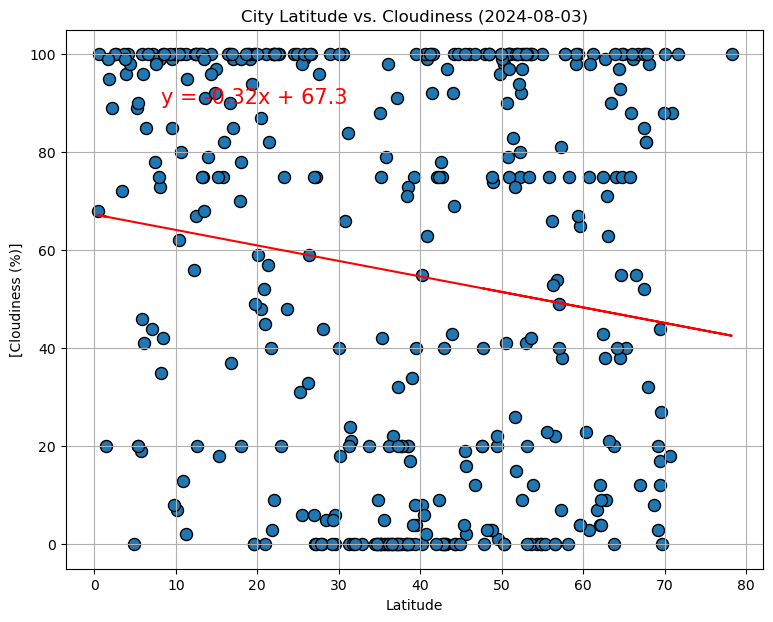

In [35]:
# Northern Hemisphere
df=northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Cloudiness'
yunits = '(%)'
linreg()

The r^2-value is 0.001


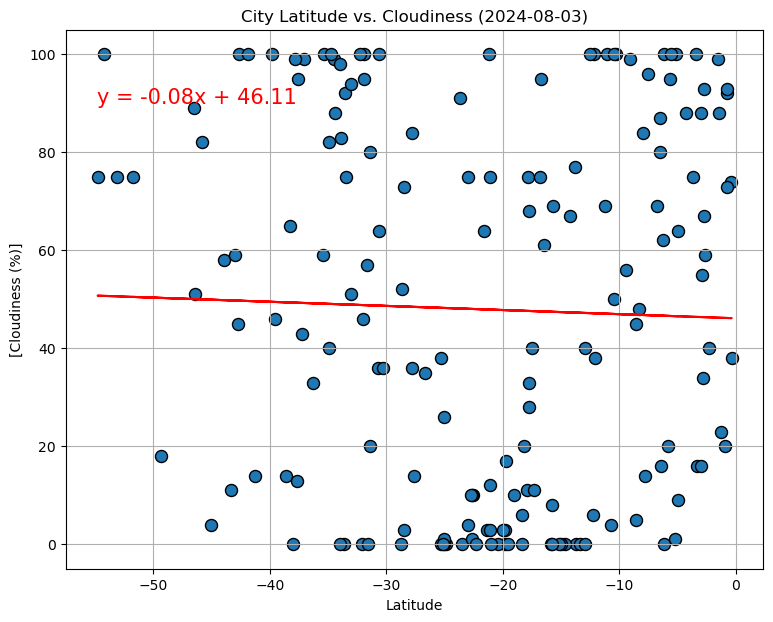

In [36]:
# Southern Hemisphere
df=southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Cloudiness'
yunits = '(%)'
linreg()

Discussion on the Linear Relationship: The r2 values for the Northern and Southern hemispheres for latitude versus cloudiness are 0 and close to 0, respectively. This suggests that there is no relationship between latitude and cloudiness.

Wind Speed vs. Latitude Linear Regression Plot

The r^2-value is 0.011


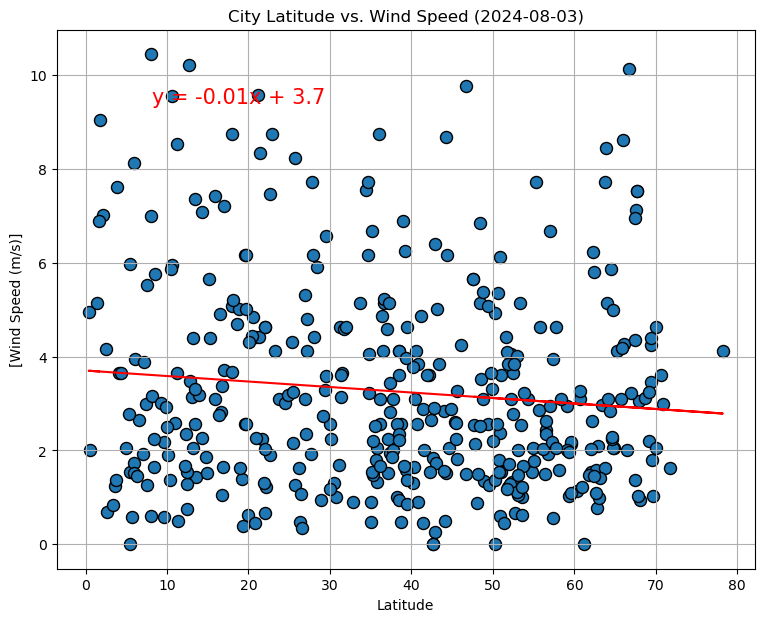

In [37]:
# Northern Hemisphere
df=northern_hemi_df
datasetID = 'North'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
linreg()

The r^2-value is 0.004


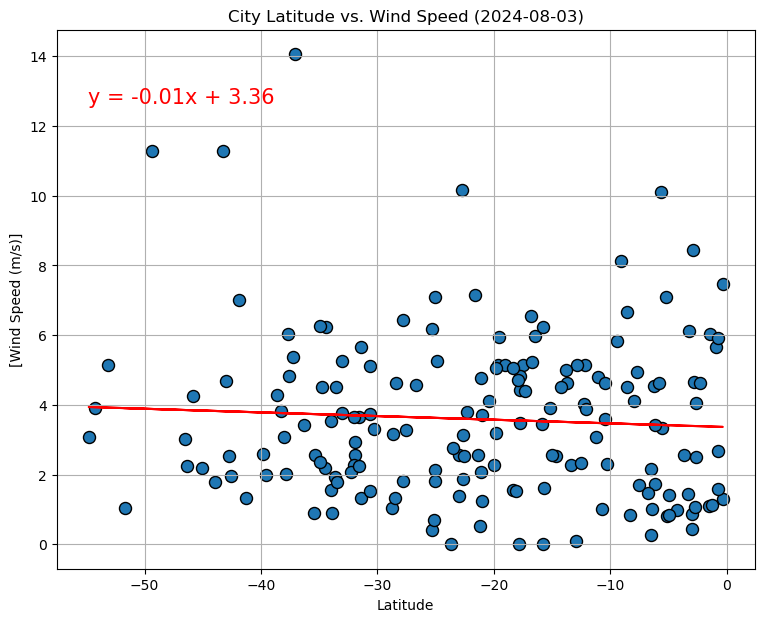

In [38]:
# Southern Hemisphere
df=southern_hemi_df
datasetID = 'South'
xparam = 'Lat'
yparam = 'Wind Speed'
yunits = '(m/s)'
linreg()

Discussion on the Linear Relationship: The r2 values for the Northern and Southern hemispheres for latitude versus windspeed are close to 0. This suggests that there is no relationship between latitude and windspeed.